# K-means Clustering

It's an **unsupervised algorithm of learning** using clustering (agrupamento)

Where the **k is the numbers of clusters**..and to find the best k number you need to use some methods like Elbow method

source: https://medium.com/pizzadedados/kmeans-e-metodo-do-cotovelo-94ded9fdf3a9

In [102]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [103]:
df = sns.load_dataset('iris')

In [104]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [105]:
df['species'].unique()
# Número de Espécies que temos...

# Logo o número de clusters são k=3...

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [106]:
# Porém para fins didáticos, vamos
# fingir que não sabemos.

#### Encontrando o número de Clusters (k)

Utilizaremos o metodo de Elbow (cotovelo)

In [107]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [108]:
# Temos 4 dimensões, comprimento e largura
# das cepas e comprimento e largura das pétalas

In [109]:
# Iniciando o método do Cotovelo

In [110]:
from sklearn.cluster import KMeans

# wcss-  Within Clusters Sum of Squares


# O KMeans já calcula o "wcss" e dá o nome
# de "inertia"


In [111]:
def calculate_wcss(data,xi,xf):
    wcss = {
        'x':[],# Número de CLusters
        'y':[],# Número WCSS calculado
    }
    for n in range(xi, xf+1):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        
        wcss['y'].append(kmeans.inertia_)
        wcss['x'].append(n)
        #wcss.append(kmeans.inertia_)

    return wcss

In [112]:
xi,xf=2,20
intervalo = range(xi,xf+1)
sum_of_squares = calculate_wcss(
    df.drop('species',axis=1),#Remover Species
    xi,
    xf
)


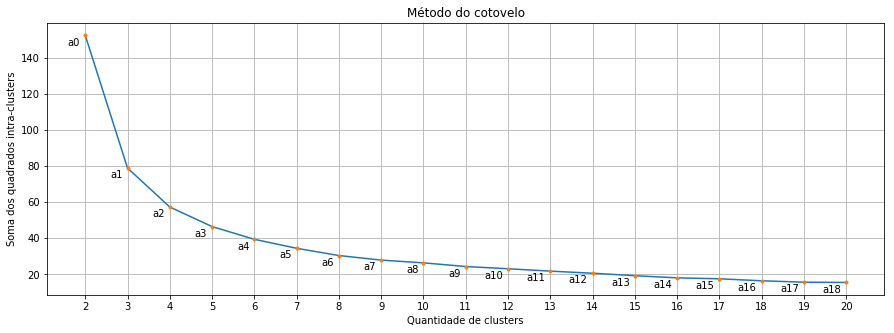

In [113]:
# Gráfico 
plt.figure(figsize=(15,5))
plt.title('Método do cotovelo')
plt.xlabel('Quantidade de clusters')
plt.ylabel('Soma dos quadrados intra-clusters')
plt.grid()
plt.xticks(intervalo)
plt.plot(intervalo, sum_of_squares['y']) # pontos laranjas
plt.plot(intervalo, sum_of_squares['y'], '.') # linha azul
for x,y in zip(intervalo,sum_of_squares['y']): # colocando nome nos pontos
    label = "a{}".format(x-2)
    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(-5,-10),
                 ha='right')
plt.show()

Cada ponto laranja é uma quantidade de clusters, note que começamos em 2 e vamos até 20 clusters. E aí pode vir a primeira dúvida: Qual desses pontos é o que simboliza de fato a quantidade ótima de clusters? 

Acontece que o ponto que indica o equilíbrio entre maior homogeneidade dentro do cluster e a maior diferença entre clusters, **é o ponto da curva mais distante de uma reta traçada entre os pontos a0 e a18**

In [114]:
number = {'x':[1,2,3],
    'y':[1,2,3]}

number = list(number.values())

for x,y in zip(number[0],number[1]):
    print(x,y)

1 1
2 2
3 3


In [115]:
# usar a equação da distância
# de um ponto a reta (Mat Básica)

def optimal_number_of_cluster(WCSS):
    # Ponto Inicial (ao)
    x1,y1=WCSS['x'][0],WCSS['y'][0]
    # Ponto Final(a18)
    x2,y2=WCSS['x'][len(WCSS['x'])-1],WCSS['y'][len(WCSS['y'])-1]
    
    
    distances = []
    
    # Tem que fazer essa jogada pra
    # pegar conteúdo de dict pra lista
    points = list(WCSS.values()) 
    
    for wcss_x,wcss_y in zip(points[0],points[1]):
        
        x0 = wcss_x
        y0 = wcss_y
        
        
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = ((y2 - y1)**2 + (x2 - x1)**2)**0.5
        distances.append(numerator/denominator)
        """"        
        print(x1,y1,x2,y2)
        print(x0,y0)
        print(numerator/denominator)
        input()
        """
    return WCSS['x'][distances.index(max(distances))]
        

In [116]:
k = optimal_number_of_cluster(sum_of_squares)

## Fitar o modelo

In [117]:
kmeans = KMeans(n_clusters=k)

In [119]:
kmeans.fit(df.drop('species',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [122]:
center = kmeans.cluster_centers_
center

array([[6.20769231, 2.85384615, 4.74615385, 1.56410256],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ],
       [5.508     , 2.6       , 3.908     , 1.204     ]])

In [153]:
center[:][1]

array([5.006, 3.428, 1.462, 0.246])

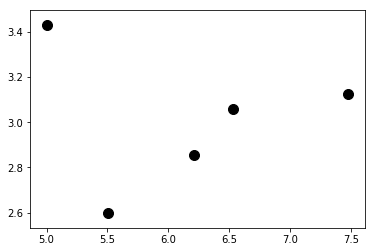

In [124]:
plt.scatter(center[:,0],center[:,1],s=100,c='000')#COloquei os pontos centrais (Centro de MAssa)


In [121]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 4, 0, 0, 0, 4, 0, 4, 4, 0, 4, 0, 4, 0,
       0, 4, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 0, 4, 0, 0, 0,
       4, 4, 4, 0, 4, 4, 4, 4, 4, 0, 4, 4, 3, 0, 2, 3, 3, 2, 4, 2, 3, 2,
       3, 3, 3, 0, 3, 3, 3, 2, 2, 0, 3, 0, 2, 0, 3, 2, 0, 0, 3, 2, 2, 2,
       3, 0, 0, 2, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 0], dtype=int32)

In [132]:
#kmeans_data = kmeans.predict()
clusters = kmeans.predict(df.drop('species',axis=1))


In [134]:
df['clusters'] = clusters

In [ ]:
df.drop('species',axis=1,inplace=True)

In [141]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [143]:
grouped_by_clusters = df.groupby('clusters')

In [144]:
grouped_by_clusters.describe()

sepal_length                                               \
                count      mean       std  min  25%  50%  75%  max   
clusters                                                             
0                39.0  6.207692  0.357171  5.6  6.0  6.2  6.4  7.0   
1                50.0  5.006000  0.352490  4.3  4.8  5.0  5.2  5.8   
2                12.0  7.475000  0.270101  7.1  7.2  7.5  7.7  7.9   
3                24.0  6.529167  0.262892  5.8  6.4  6.5  6.7  6.9   
4                25.0  5.508000  0.326497  4.9  5.4  5.6  5.7  6.1   

         sepal_width            ... petal_length      petal_width            \
               count      mean  ...          75%  max       count      mean   
clusters                        ...                                           
0               39.0  2.853846  ...        4.950  5.6        39.0  1.564103   
1               50.0  3.428000  ...        1.575  1.9        50.0  0.246000   
2               12.0  3.125000  ...        6.625  6.9        12.0  2.050000   
3               24.0  3.058333  ...        5.700  6.0        24.0  2.162500   
4               25.0  2.600000  ...        4.100  4.5        25.0  1.204000   

                                                  
               std  min    25%   50%    75%  max  
clusters                                          
0         0.217022  1.2  1.400  1.50  1.800  2.0  
1         0.105386  0.1  0.200  0.20  0.300  0.6  
2         0.254058  1.6  1.875  2.05  2.225  2.5  
3         0.226144  1.8  2.000  2.20  2.300  2.5  
4         0.179072  1.0  1.000  1.20  1.300  1.7  

[5 rows x 32 columns]

"\nplt.subplot(1, 2, 2)\nplt.title('Depois')\nplt.xlabel('comprimento da pétala')\nplt.scatter(iris['petal_length'],iris['petal_width'], c=df_clusters['depois'])\n\nplt.show()\n"

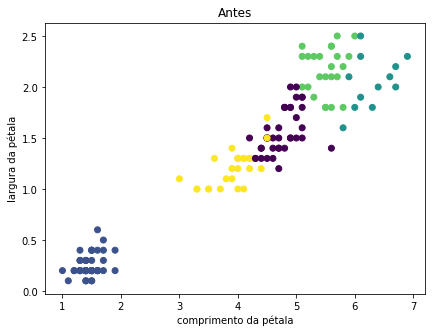

In [145]:

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.title('Antes')
plt.xlabel('comprimento da pétala')
plt.ylabel('largura da pétala')
plt.scatter(df['petal_length'],df['petal_width'], c=df['clusters'])
plt.scatter(center[:,0],center[:,1],s=100,c='000')#COloquei os pontos centrais (Centro de MAssa)
